# Diagramas Tonelaje Ley

### ToDo

- menu desplegable seleccionando tipo de deposito
- menu seleccionando el archivo con los datos de yacimienos que se quieren evaluar
- casillero para optar si desplegar los datos correspondientes a otros yac
- descripcion de tipo de modelo
- seleccionar el depósito de mayor tonelage

* 25a. Descriptive model of hot-spring Au-Ag, by Byron R. Berger


*  25b. Descriptive model of Creede epithermal veins, by Dan L. Mosier, Takeo Sa to, Norman J Page,
Donald A. Singer, and Byron R. Berger

Grade and tonnage model of Creede epithermal VElins, by Dan L. Mosier, Takeo Sato, and
Donald A. Singer


*  25c. Descriptive model of Comstock epithermal veins,, by Dan L. Mosier, Donald A. Singer, and
Byron R. Berger

Grade and tonnage model of Comstock epithermal veins, by Dan L. Mosier, Takeo Sato, and
Donald A. Singer


* 25d. Descriptive model of Sado epithermal veins, by Dan L. Mosier, Byron R. Berger, and
Donald A. Singer

Grade and tonnage model of Sado epithermal veins, by Dan L. Mosier and Takeo Sa to


* 25e. Descriptive model of epithermal quartz-alunite Au, by Byron R. Berger

Grade and tonnage model of epithermal quartz-alunite Au, by Dan L. Mosier and
W. David Menzie



In [1]:
import pandas as pd
import numpy as np
#from numpy import random
#from math import log

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
#import matplotlib.transforms as transforms

#Distribucion Normal
#from scipy.stats import norm, kstest
#from scipy import stats

#Test de normalidad
#from statsmodels.graphics.gofplots import qqplot
#from scipy.stats import shapiro, pearsonr

#
from termcolor import colored, cprint

plt.style.use('seaborn')

In [2]:
def std_ellipse(x, y, ax, label, n_std=1, facecolor='none', **kwargs):
    """
    Create a plot of the standar desviation ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    
    
    """
    # two-dimensionl dataset.

    
    ellipse = Ellipse((np.mean(x), np.mean(y)), width=np.std(x) * 2 , height=np.std(y) * 2,
                      facecolor=facecolor, linewidth=2, **kwargs)
    
    ax.add_patch(ellipse)
    ax.text(np.mean(x), np.mean(y), label)
    
    return

def get_minMaxLog10Dist(pDF):
    '''Obtención de los limites de la ellipse'''
    mean     = np.mean(pDF)
    std      = np.std(pDF)
    log10Min = mean - std
    log10Max = mean + std
    minVal   = 10 ** log10Min
    maxVal   = 10 ** log10Max
    return (minVal,maxVal)

In [3]:
#Conversiones entre medidas

def troyOunces2gram(ounces):
    return onces / 31.103481

def gram2troyOunces(grams):
    return grams * 31.103481

def ouncesTonne2gramTonne(gradeOunces):
    return gradeOunces / 0.0291652

def gramTonne2ouncesTonne(gradeGrams):
    return gradeGrams * 0.0291652

def tonne2ton(tnn):
    return tnn /  907.18474

def ton2tonne(t):
    return tn *  907.18474

def percent2gramTonne(gradePercent):
    return gradePercent * 10000


def TaylorRuleofYacLife(t):
    '''
    Regla de Taylor para el cálculo de la vida del yacimiento
    t = Tonneage
    '''
    return 0.2 * ( t ** 0.25 )

## Modelos de Depósitos

In [4]:
modelosNamesLst = ['Hot-spring Au-Ag', 
                   'Epithermal veins Creede-type', 
                   'Epithermal veins Comstock-type',
                   'Epithermal veins Sado-type',
                   'Epithermal quartz-alunite Au']

modelosLst      = ['25a', '25b', '25c', '25d', '25e']


Depdf = pd.DataFrame()

for i in modelosLst:
    
    dataFile = '../data/' + i + '.csv'
    dataFrameName = 'df' + i
    
    exec("%s = pd.read_csv(dataFile, usecols=['tonn', 'Au'])" % ( dataFrameName ))
   


In [5]:
# Filtrado de ceros
#df25b[(df25b['Au'] != 0)]

for i in modelosLst:
    dataFrameName = 'df' + i
    exec("%s = %s[( %s['Au'] != 0)]" % ( dataFrameName, dataFrameName, dataFrameName))

In [6]:
# conversion de los valores a Log10

for i in modelosLst:
    dataFrameName = 'df' + i
    exec( "%s['log10Au']   = np.log10(%s['Au'])"   % (dataFrameName, dataFrameName))
    exec( "%s['log10tonn'] = np.log10(%s['tonn'])" % (dataFrameName, dataFrameName))
    

## Datos del Depósito


In [7]:
depName = 'Calcatreu v49-Nelson'
calcatreuIndicTonn = 7.83 * 10 ** 6
calcatreuAu        = 2.28
calcatreuAg        = 20.29

castroSurIndicTonn = 2.010 * 10 ** 6
castroSurAu        = 1.40
castroSurAg        = 14.77

#"Pachuca-Real del Monte"
PRMonteTonn        = 107000000

calcatreuIndicLogTonn = np.log10(calcatreuIndicTonn)
calcatreuLogAu        = np.log10(calcatreuAu /10000) #g/t a %

castroSurIndicLogTonn = np.log10(castroSurIndicTonn)
castroSurLogAu        = np.log10(castroSurAu / 10000)
castroSurLogAg        = np.log10(castroSurAg)

print('Calcatreu v49')
print(calcatreuIndicLogTonn)
print(f"{calcatreuLogAu}%")

print()

print('Castro Sur')
print(castroSurIndicLogTonn)
print(castroSurLogAu)

Calcatreu v49
6.893761762057943
-3.642065152999546%

Castro Sur
6.303196057420489
-3.853871964321762


## Diagrama Tonelaje Ley

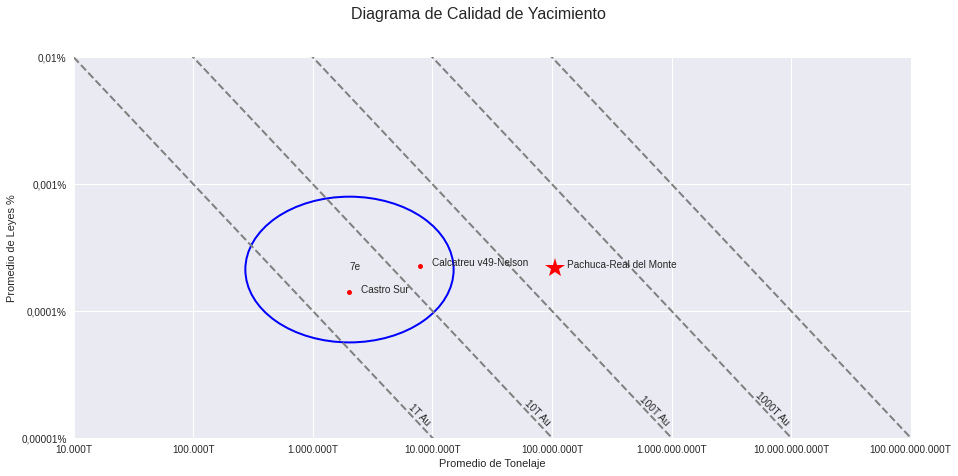

In [8]:
# Diagrama Tonelaje y Ley para Au Agrupados Tipo de Modelo de Yacimiento

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axScatter = plt.subplots(figsize=(15, 7))

# parametros del subplot
axScatter.set_xlim(4,11)
axScatter.set_ylim(-5, -2)


#Lineas de igual ley x tonelaje
AuxTonneX = [4,8]
AuxTonneY = [ -2,-6]
axScatter.plot(AuxTonneX, AuxTonneY, label='1T Au', linewidth=2, color='gray',linestyle='dashed')

AuxTonneX = [4,9]
AuxTonneY = [ -1,-6]
axScatter.plot(AuxTonneX, AuxTonneY, label='10T Au', linewidth=2, color='gray',linestyle='dashed')

AuxTonneX = [4,10]
AuxTonneY = [ -0,-6]
axScatter.plot(AuxTonneX, AuxTonneY, label='100T Au', linewidth=2, color='gray',linestyle='dashed')

AuxTonneX = [4,11]
AuxTonneY = [ 1,-6]
axScatter.plot(AuxTonneX, AuxTonneY, label='1000T Au', linewidth=2, color='gray',linestyle='dashed')

AuxTonneX = [4,12]
AuxTonneY = [ 2,-6]
axScatter.plot(AuxTonneX, AuxTonneY, label='10000T Au', linewidth=2, color='gray',linestyle='dashed')
#axScatter.set_aspect(1.)
fig.suptitle('Diagrama de Calidad de Yacimiento', fontsize=16)

axScatter.set_xlabel('Promedio de Tonelaje')
axScatter.set_ylabel('Promedio de Leyes %')

#formateo de ticks
plt.sca(axScatter)

currentXticks = [4,5,6,7,8,9,10,11]
#xTickLabelLst = [['{:,.0f}T'.format( 10 ** x) for x in currentXticks]]
xTickLabelLst = ['10.000T', '100.000T', '1.000.000T', '10.000.000T', '100.000.000T', '1.000.000.000T',
                 '10.000.000.000T', '100.000.000.000T']

plt.xticks(currentXticks, xTickLabelLst)

currentYticks = [-5,-4, -3, -2]
yTickLabelLst = ['0,00001%', '0,0001%', '0,001%', '0,01%']
plt.yticks(currentYticks, yTickLabelLst)

axScatter.text( 7,-4.9,'1T Au',rotation=-45, horizontalalignment='right')
axScatter.text(8,-4.9,'10T Au',rotation=-45, horizontalalignment='right')
axScatter.text(9,-4.9,'100T Au',rotation=-45, horizontalalignment='right')
axScatter.text(10,-4.9,'1000T Au',rotation=-45, horizontalalignment='right')

std_ellipse( df25b['log10tonn'], df25b['log10Au'] ,axScatter, '7e', 1, edgecolor='b')

axScatter.plot([castroSurIndicLogTonn], [castroSurLogAu], marker='o', markersize=5, color="red")
axScatter.text(castroSurIndicLogTonn + 0.1, castroSurLogAu, 'Castro Sur')

axScatter.plot([calcatreuIndicLogTonn], [calcatreuLogAu], marker='o', markersize=5, color="red")
axScatter.text(calcatreuIndicLogTonn + 0.1, calcatreuLogAu, depName)

axScatter.plot(np.log10(107000000), np.log10(0.00022), marker='*', markersize=20, color="red")
axScatter.text(np.log10(107000000) + 0.1, np.log10(0.00022), "Pachuca-Real del Monte")

#Despliega el gráfico
plt.show()


In [9]:
tonnMinMax = get_minMaxLog10Dist(df25b['log10tonn'])
AuMinMax   = get_minMaxLog10Dist(df25b['log10Au'])

percent2gramTonne(AuMinMax[0])

print(f'Rango de tonelages {tonnMinMax[0]:,.0f} MT - {tonnMinMax[1]:,.0f} MT')
print(f'Rango de leyes de Au {AuMinMax[0]:.8f}% - {AuMinMax[1]:.8f}%')
print(f'Rango de leyes de Au {percent2gramTonne(AuMinMax[0]):.2f} g/T - {percent2gramTonne(AuMinMax[1]):.2f} g/T')

Rango de tonelages 272,620 MT - 15,045,378 MT
Rango de leyes de Au 0.00005650% - 0.00079619%
Rango de leyes de Au 0.57 g/T - 7.96 g/T
